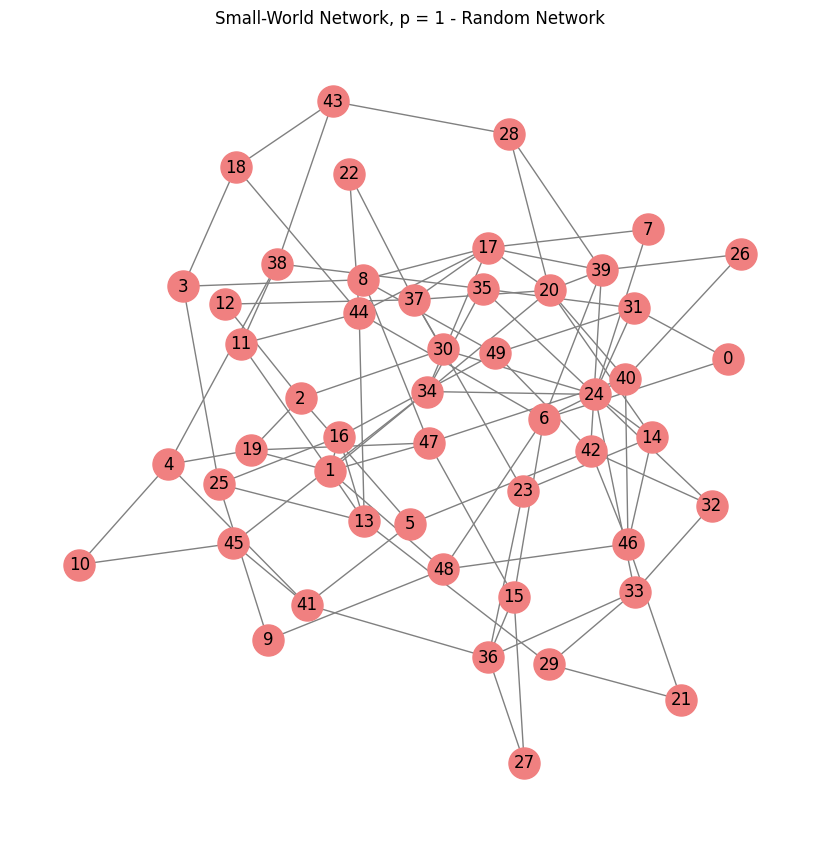

Clustering Coefficient: 0.09
Average Shortest Path Length: 2.89
Adjacency Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(45)  # Ensures the same randomness for edge rewiring
np.random.seed(45)  # Ensures consistent behavior for numpy-based randomness


# Parameters for the Watts-Strogatz model
n = 50  # Number of nodes
k = 4 # Each node is connected to k nearest neighbors in a ring topology greater than ln(50) = 3.9
p = 1 # The probability of rewiring each edge

# Create a small-world network using the Watts-Strogatz model
small_world = nx.watts_strogatz_graph(n, k, p)

# Draw the network
plt.figure(figsize=(8, 8))
nx.draw(small_world, with_labels=True, node_color="lightcoral", node_size=500, edge_color="gray")
plt.title(f"Small-World Network, p = {p} - Random Network")
plt.show()

# Analyze the network
clustering_coefficient = nx.average_clustering(small_world)
average_shortest_path_length = nx.average_shortest_path_length(small_world)

print(f"Clustering Coefficient: {clustering_coefficient:.2f}")
print(f"Average Shortest Path Length: {average_shortest_path_length:.2f}")

# Generate and display the adjacency matrix
adj_random = nx.adjacency_matrix(small_world).todense()

print("Adjacency Matrix:")
print(np.array(adj_random))


In [2]:
def func(x, y, alpha):
    if x <= 0:
        f1 = (alpha / (1 - x)) + y
        return f1
    
    elif 0< x < alpha + y:
        f2 = alpha + y
        return f2
    
    else:  # x >= alpha + y 
        f3 = -1
        return f3




def step_pulse(I0, I_pulse, t_start, duration, T, n_pulses, interval):
    """Generate a step pulse current array. Parameters:
        I0 (float): Initial current value.
        I_pulse (float): Amplitude of the pulse.
        t_start (int): Start time of the first pulse.
        duration (int): Duration of each pulse.
        T (int): Total time steps.
        n_pulses (int): Number of pulses.
        interval (int): Time between the end of one pulse and the start of the next.
    Returns:
        numpy.ndarray: Array of current values over time."""
    

    t = np.arange(0, T)
    current = np.full_like(t, I0, dtype=float)
    for i in range(n_pulses):
        pulse_start = t_start + i * (duration + interval)
        pulse_end = pulse_start + duration
        current[(t >= pulse_start) & (t <= pulse_end)] = I_pulse
    return current



def coupled_rulkov_curr(N, T, mu, alpha, sigma, coupling_const, adja_matrix, pulse_current, pulse_nodes
                        ):
    """
    Simulate the coupled Rulkov model with a step pulse current applied to random nodes.
    
    Parameters:
        N (int): Number of nodes.
        T (int): Number of time steps.
        mu, alpha, sigma (float): Rulkov model parameters.
        coupling_const (float): Coupling constant.
        adja_matrix (numpy.ndarray): Adjacency matrix of the network.
        I0, I_pulse, t_start, duration, n_pulses, interval (float): Step pulse parameters.
        num_pulse_nodes (int): Number of nodes to receive the pulse.
    
    Returns:
        tuple: (xlist, ylist) with states of nodes over time.
    """
    # Initialize x and y values
    x_init = -1.01
    y_init = -3

    xlist = np.zeros((T, N))
    ylist = np.zeros((T, N))

    # Initial conditions
    xlist[0, :] = x_init
    ylist[0, :] = y_init



    # Time evolution
    for t in range(1, T):
        for i in range(N):
            # Calculate coupling term
            coupling_term = coupling_const * sum(
                adja_matrix[i, j] * (xlist[t-1, j] - xlist[t-1, i]) for j in range(N)
            )

            # Determine if the current pulse applies to this node
            external_current = pulse_current[t] if i == pulse_nodes else 0

            # Update x and y for node i
            xlist[t, i] = func(xlist[t-1, i], ylist[t-1, i], alpha) + coupling_term
            ylist[t, i] = ylist[t-1, i] - mu * (xlist[t-1, i] + 1) + mu * (sigma + external_current)

    return xlist, ylist


In [3]:
T = 30000
N = n
sigma = -0.01
mu  = 0.001
adja_matrix = adj_random 
alpha = 4
cc = 0.009
I0 = 0
I_pulse = 1
t_start = 0
duration = T
n_pulses = 1
interval = 0
num_pulse_nodes = 1


pulse_current = step_pulse(I0, I_pulse, t_start, duration, T, n_pulses, interval)
pulse_nodes = 25
# pulse_nodes = np.random.choice(N, num_pulse_nodes, replace=False)

# xlri, ylri =  coupled_rulkov_curr(N, T, mu, alpha, sigma, cc, adja_matrix,pulse_current, pulse_nodes)    

# import matplotlib.pyplot as plt

# # Your existing code for generating the plot
# plt.figure(figsize=(8, 6))
# plt.imshow(xlri[10000:, :], aspect='auto', cmap='viridis', interpolation='nearest')
# plt.colorbar(label='Membrane Potential')
# plt.xlabel('Node')
# plt.ylabel('Time(n)')
# plt.tight_layout()

# # Save the figure in multiple formats
# plt.savefig("graph.tiff", format="tiff", dpi=300)
# plt.savefig("graph.eps", format="eps", dpi=300)
# plt.savefig("graph.svg", format="svg", dpi=300)
# plt.savefig("graph.pdf", format="pdf", dpi=300)
# plt.savefig("graph.png", format="png", dpi=300)

plt.show()
 

0


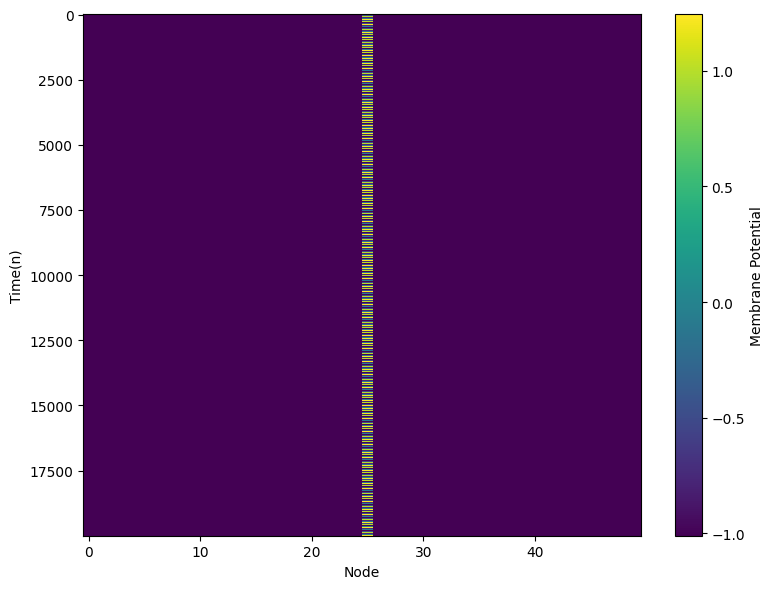

0.001


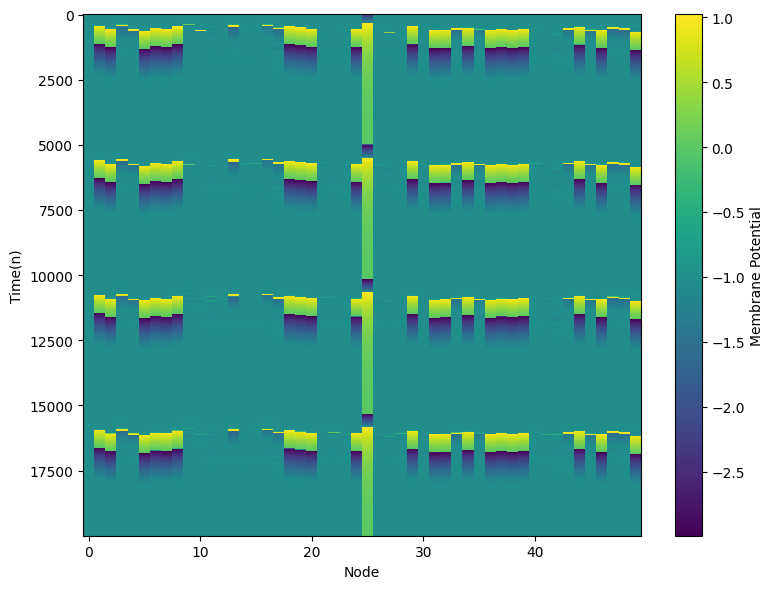

0.002


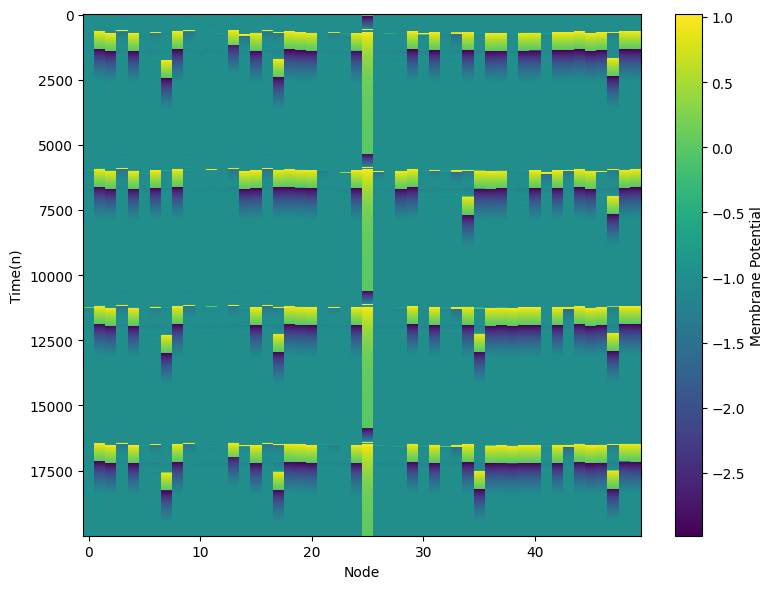

0.003


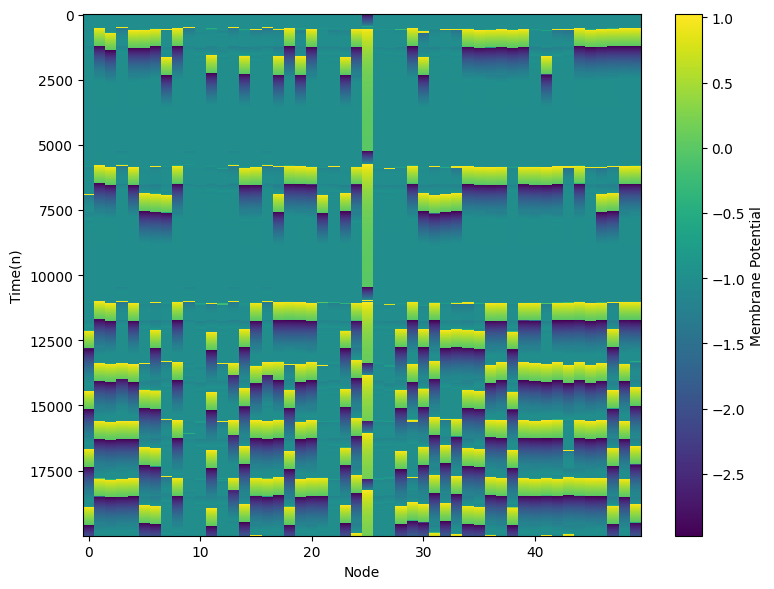

0.004


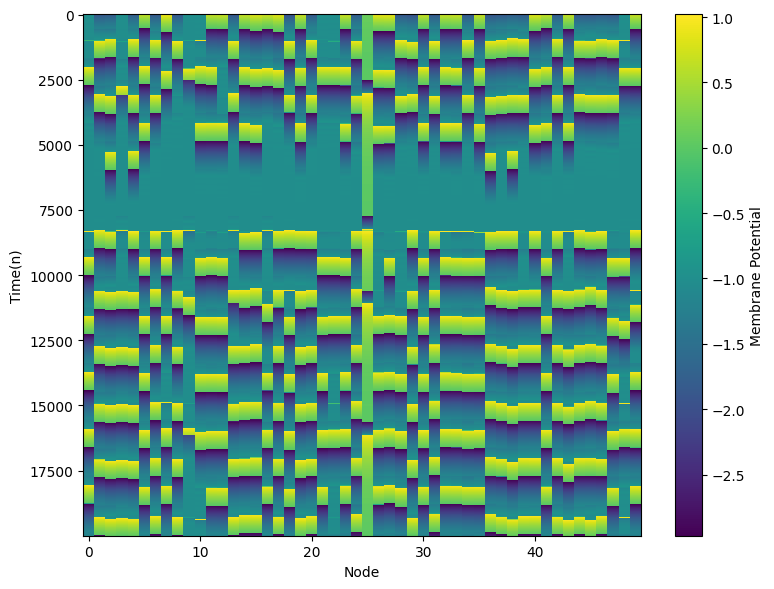

0.005


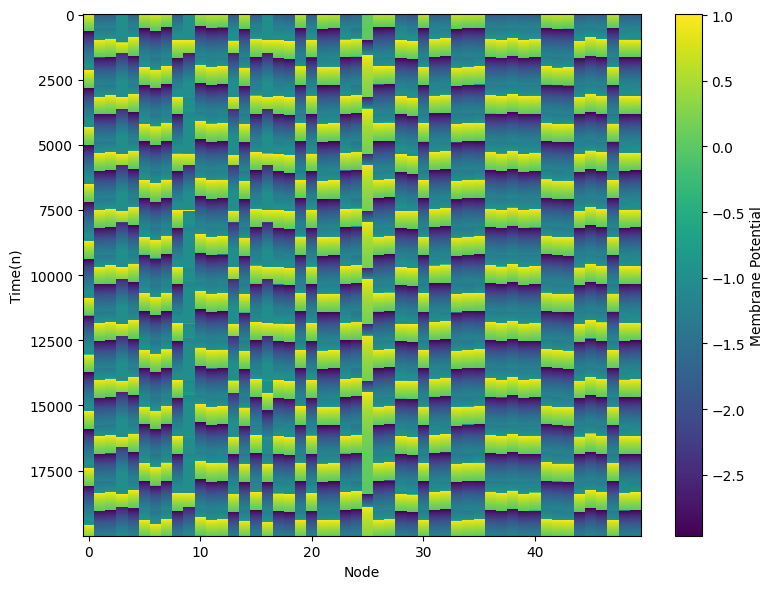

0.006


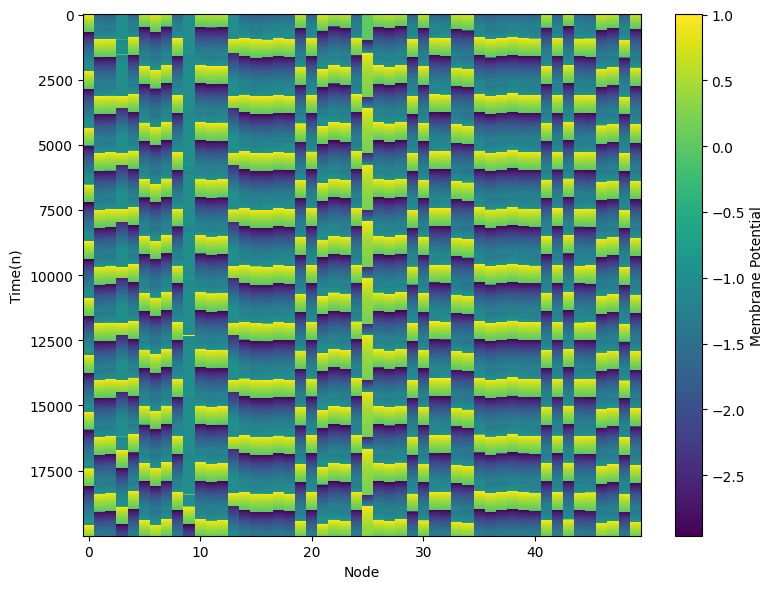

0.007


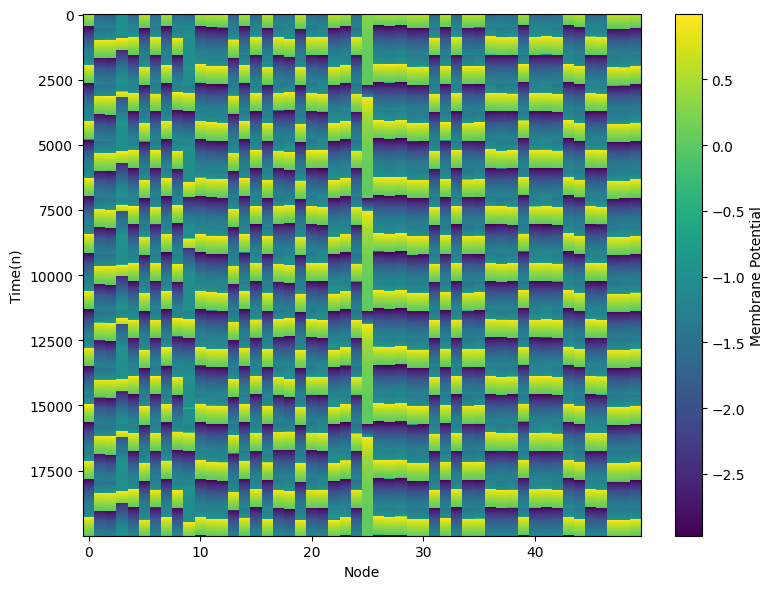

0.008


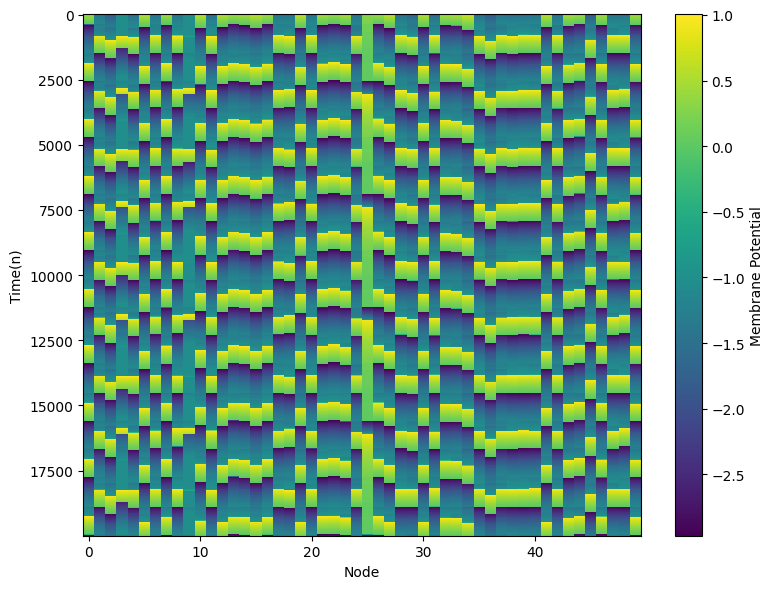

0.009


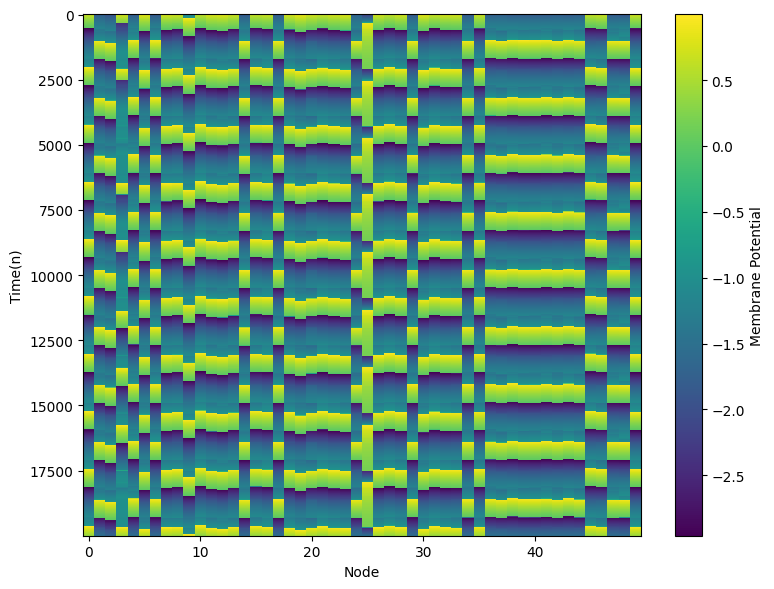

0.01


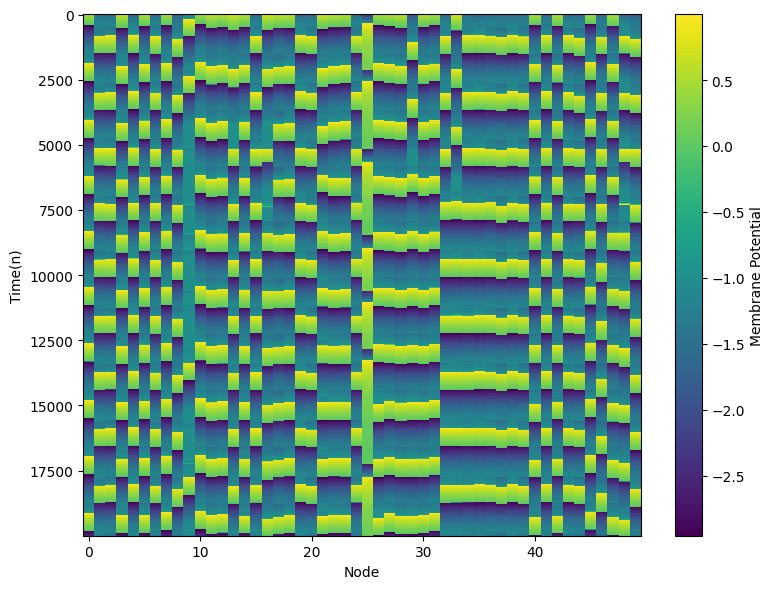

0.02


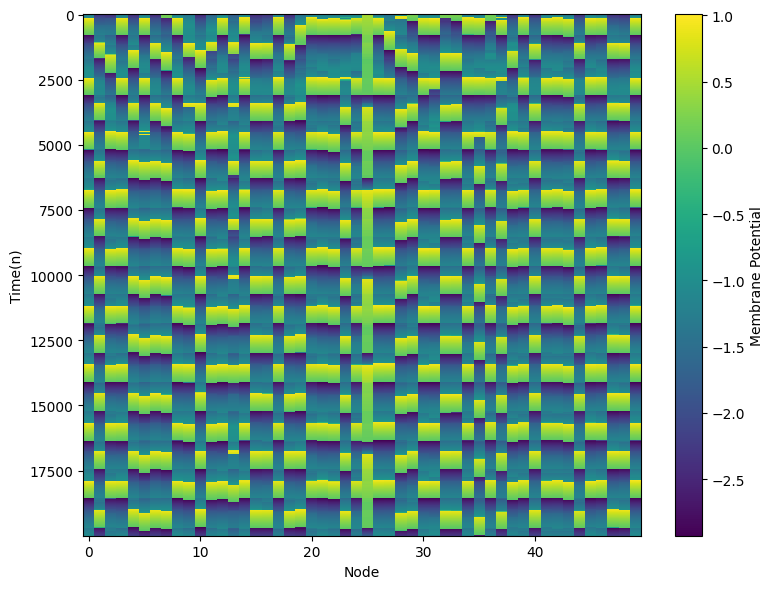

0.03


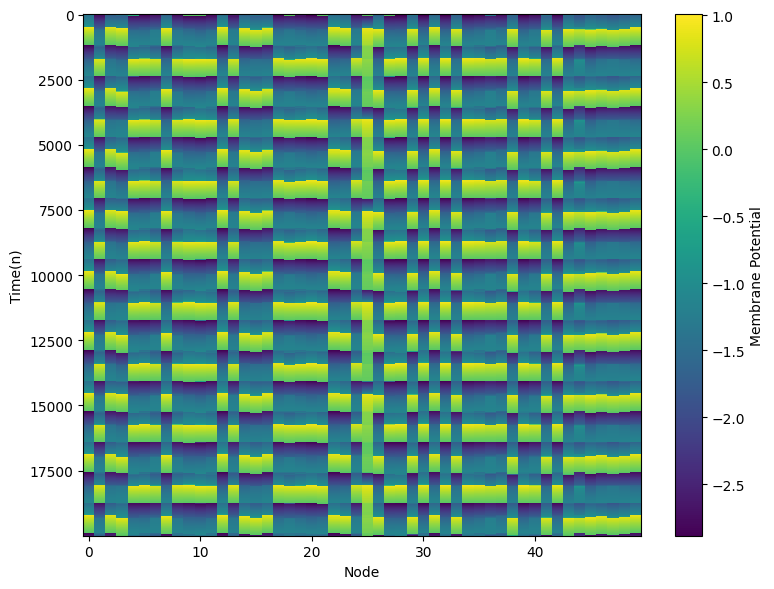

0.04


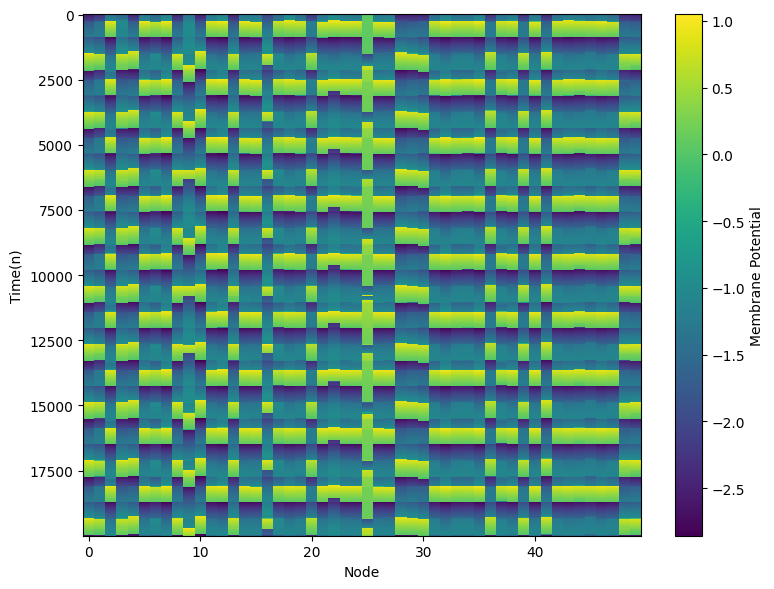

0.05


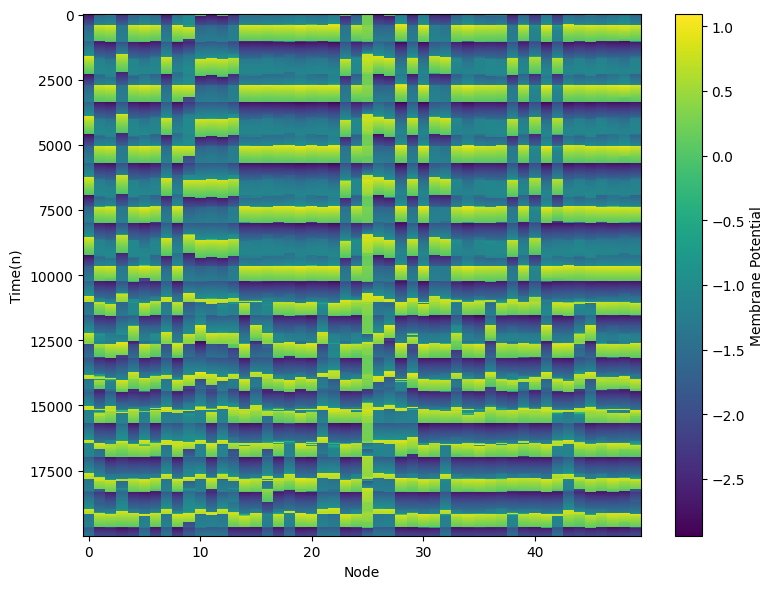

0.06


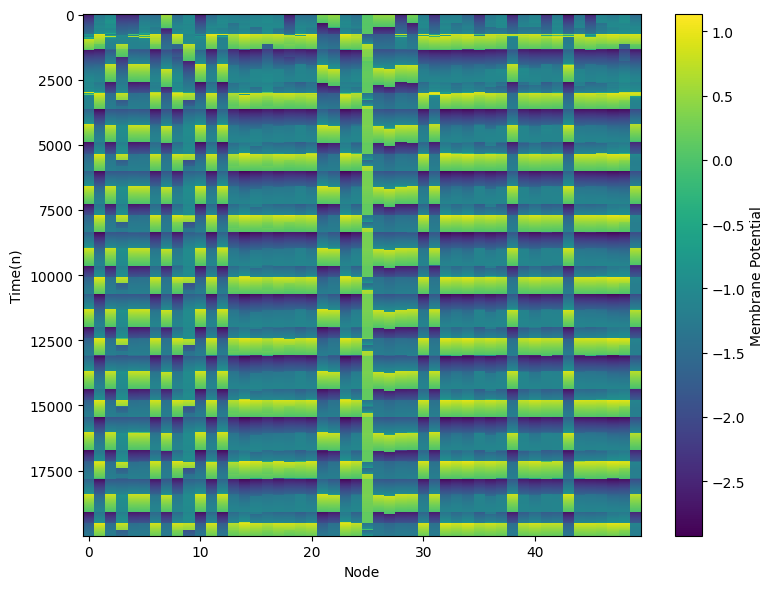

0.07


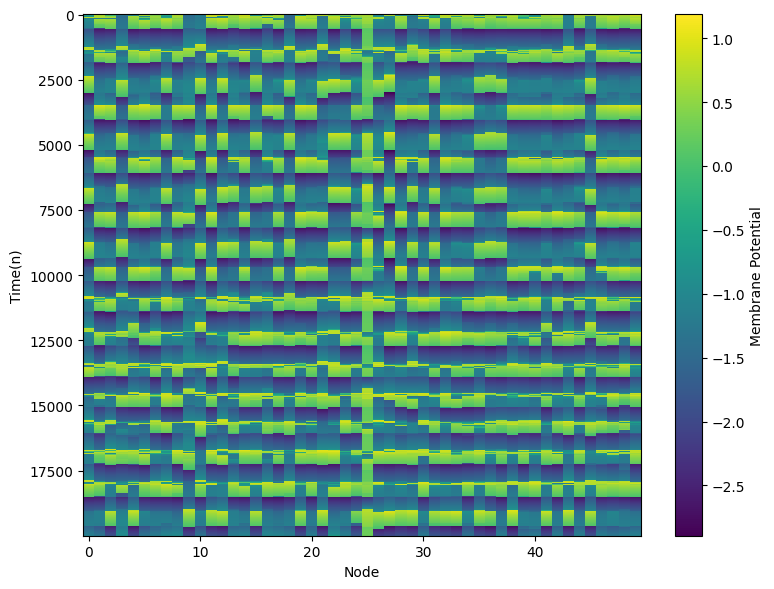

0.08


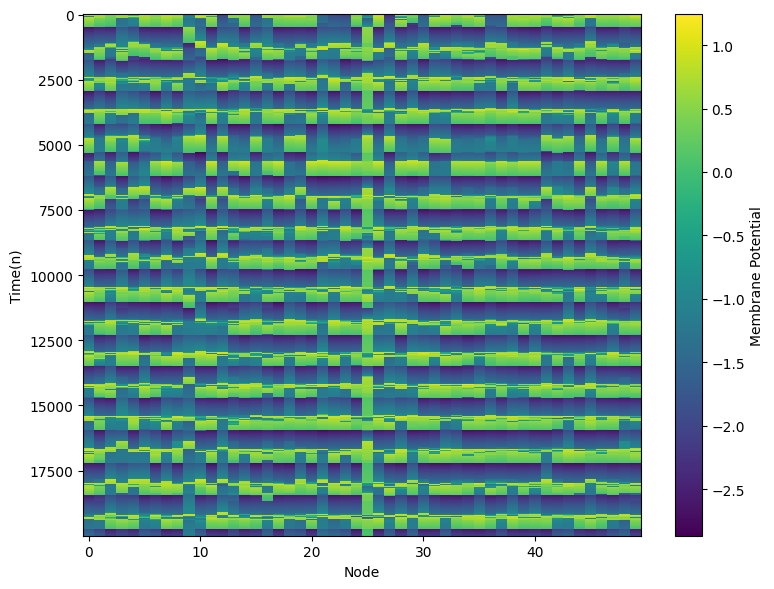

0.09


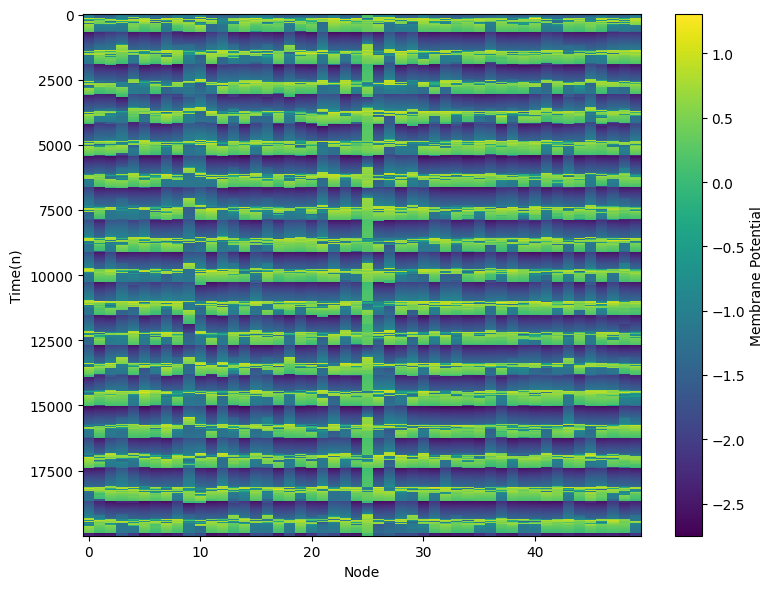

In [4]:


cclist = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

# results = []  # List to store (cc, xlf, ylf) tuples

for cc in cclist:
    xlri, ylri =  coupled_rulkov_curr(N, T, mu, alpha, sigma, cc, adja_matrix,pulse_current, pulse_nodes)    

    
    plt.figure(figsize=(8, 6))
    plt.imshow(xlri[10000:, :], aspect='auto', cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Membrane Potential')
    # plt.title(f'Random Network, Coupling Constant = {cc}', pad=20)  # Adjust pad value as needed
    plt.xlabel('Node')
    plt.ylabel('Time(n)')

    plt.tight_layout()
    print(cc)
    plt.show()

# Now, `results` contains tuples of (cc, xlf, ylf) for each cc


In [5]:


def x_metric(xlist):
    adjusted_xlist = np.abs(xlist + 1.01)  # Step 1 & 2
    node_avg = np.mean(adjusted_xlist, axis=1)  # Step 3: Average over nodes
    final_metric = np.mean(node_avg)  # Step 4: Average over time
    return final_metric





Coupling Constant: 0, Metric: 0.019846353715060272
Coupling Constant: 0.001, Metric: 0.20500117898811507
Coupling Constant: 0.002, Metric: 0.25690994123056204
Coupling Constant: 0.003, Metric: 0.4078841533243051
Coupling Constant: 0.004, Metric: 0.7719195976418275
Coupling Constant: 0.005, Metric: 0.8960081839909655
Coupling Constant: 0.006, Metric: 0.8959524358010184
Coupling Constant: 0.007, Metric: 0.9049561707533733
Coupling Constant: 0.008, Metric: 0.8988475564064817
Coupling Constant: 0.009, Metric: 0.9045658786459667
Coupling Constant: 0.01, Metric: 0.9073605582168199
Coupling Constant: 0.02, Metric: 0.8782437649026823
Coupling Constant: 0.03, Metric: 0.8344243879710831
Coupling Constant: 0.04, Metric: 0.8129902319666927
Coupling Constant: 0.05, Metric: 0.8497847973961293
Coupling Constant: 0.06, Metric: 0.8054488818442906
Coupling Constant: 0.07, Metric: 0.8498348955500488
Coupling Constant: 0.08, Metric: 0.8701658846240676
Coupling Constant: 0.09, Metric: 0.8715364461112828


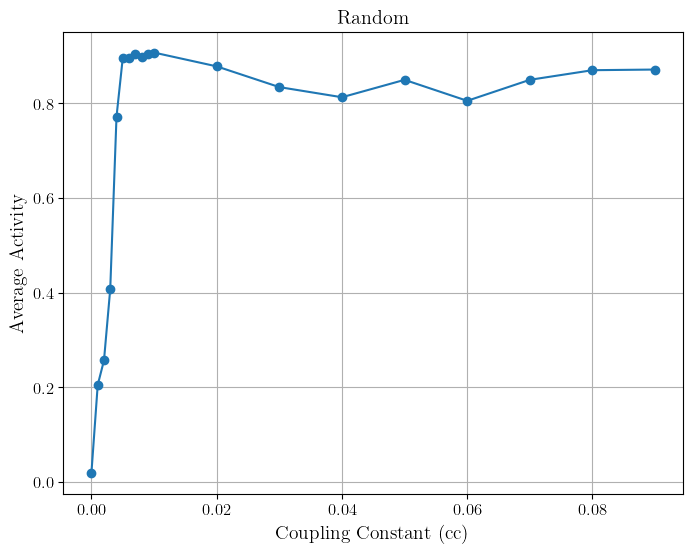

In [ ]:
# plt.rcParams.update({
#     "text.usetex": True,  # Use LaTeX for text
#     "font.family": "serif",  # Use serif fonts (similar to LaTeX default)
#     "font.serif": ["Computer Modern"],  # Set LaTeX-like font
#     "axes.labelsize": 14,  # Set font size for axis labels
#     "font.size": 12,  # General font size
# })

# Apply x_metric to each stored xlf in results
metrics = [(cc, x_metric(xlri)) for cc, xlri in results]

# Print or analyze the results
for cc, metric in metrics:
    print(f"Coupling Constant: {cc}, Metric: {metric}")

# Extract cc values and corresponding metrics
cc_values = [cc for cc, _ in metrics]
metric_values = [metric for _, metric in metrics]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(cc_values, metric_values, marker='o', linestyle='-')

plt.xlabel("Coupling Constant (cc)")
plt.ylabel("Average Activity")
plt.title("Random")
plt.grid(True)

plt.show()
